# Naive Bayes Classification using Scikit-learn

#### Defining Dataset

In this example, you can use the dummy dataset with three columns: wheather, temperature and play. First two are features(wheather, temperature) and another one is the label.

In [ ]:
# Assigning features and label variables
wheather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

#### Encoding Features

First, you need to convert these string labels into numbers. for example: 'Overcast', 'Rainy', 'Sunny' as 0, 1, 2. This is known as label encoding. Scikit-learn provide LabelEncoder liabrary for encoding labels with value between 0 and one less than number of descrete classes. 

In [6]:
# Import LabelEncoder 
from sklearn import preprocessing
#creating labelEncoder 
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
wheather_encoded=le.fit_transform(wheather)
print wheather_encoded

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


Similarly, you can also encode temp and play columns.

In [7]:
# Converting string labels into numbers
temp_encoded=le.fit_transform(temp)
label=le.fit_transform(play)
print "Temp:",temp_encoded
print "Play:",label

Temp: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


Now combine both the features(wheather and temp) in single variable( list of tuples) 

In [8]:
#Combinig wheather and temp into single listof tuples 
features=zip(wheather_encoded,temp_encoded)
print features

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


#### Generating Model 

Generate model using naive bayes classifier in following steps:

   * Create naive bayes classifier
   * Fit the dataset on classifier
   * Perform prediction

In [9]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(features,label)

#Predict Output 
predicted= model.predict([[0,2]]) # 0:Overcast, 2:Mild
print "Predicted Value:", predicted

Predicted Value: [1]


Here, 1 indicates that players can 'play'.

### Naive Bayes with Multiple Labels

Till now you have learned Naive Bayes classification with binary labels. Now you will learn about multiple class classification in Naive Bayes. which is known as multinomial Naive Bayes classification. for example, if you want to classify a news article about technology, entertainment, politics, or sports. 

In model building part, you can use wine dataset which is a very famous multi-class classification problem. This dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

Dataset comprises 13  features (alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, hue, od280/od315_of_diluted_wines, proline) and type of wine cultivar. This data has three type of wine Class_0, Class_1, and Class_3. Here you can build a model to classify the type of wine.

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.The dataset is available in the scikit-learn library.

#### Loading Data

Let's first load the required wine dataset from scikit-learn datasets.

In [12]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
wine = datasets.load_wine()

#### Exploring Data

You can print the target and feature names, to make sure you have the right dataset, as such:

In [13]:
# print the names of the 13 features
print "Features: ", wine.feature_names

# print the label type of wine(class_0, class_1, class_2)
print "Labels: ", wine.target_names

Features:  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels:  ['class_0' 'class_1' 'class_2']


It's a good idea to always explore your data a bit, so you know what you're working with. Here, you can see the first five rows of the dataset are printed, as well as the target variable for the whole dataset.

In [14]:
# print data(feature)shape
wine.data.shape

(178L, 13L)

In [15]:
# print the wine data features (top 5 records)
print wine.data[0:5]

[[  1.42300000e+01   1.71000000e+00   2.43000000e+00   1.56000000e+01
    1.27000000e+02   2.80000000e+00   3.06000000e+00   2.80000000e-01
    2.29000000e+00   5.64000000e+00   1.04000000e+00   3.92000000e+00
    1.06500000e+03]
 [  1.32000000e+01   1.78000000e+00   2.14000000e+00   1.12000000e+01
    1.00000000e+02   2.65000000e+00   2.76000000e+00   2.60000000e-01
    1.28000000e+00   4.38000000e+00   1.05000000e+00   3.40000000e+00
    1.05000000e+03]
 [  1.31600000e+01   2.36000000e+00   2.67000000e+00   1.86000000e+01
    1.01000000e+02   2.80000000e+00   3.24000000e+00   3.00000000e-01
    2.81000000e+00   5.68000000e+00   1.03000000e+00   3.17000000e+00
    1.18500000e+03]
 [  1.43700000e+01   1.95000000e+00   2.50000000e+00   1.68000000e+01
    1.13000000e+02   3.85000000e+00   3.49000000e+00   2.40000000e-01
    2.18000000e+00   7.80000000e+00   8.60000000e-01   3.45000000e+00
    1.48000000e+03]
 [  1.32400000e+01   2.59000000e+00   2.87000000e+00   2.10000000e+01
    1.1800

In [16]:
# print the wine labels (0:Class_0, 1:class_2, 2:class_2)
print wine.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


#### Spliting Data 

First, you separate the columns into dependent and independent variables(or features and label). Then you split those variable into train and test set. 

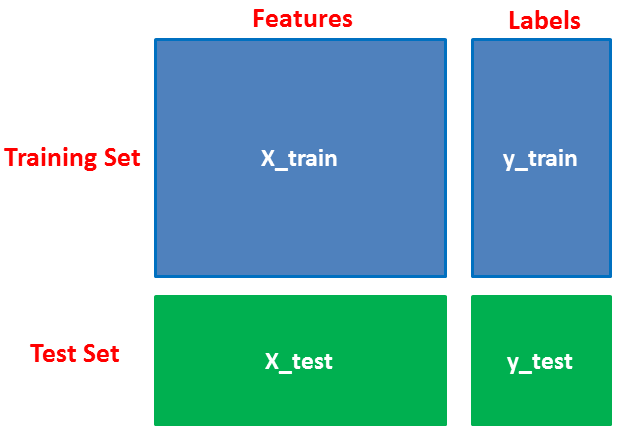

In [18]:
# Import train_test_split function
from sklearn.cross_validation import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3,random_state=109) # 70% training and 30% test

#### Model Generation

After spliting, you will generate random forest model on training set and perform prediction on test set features.

In [19]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets 
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

#### Evaluating Model

After model generation, check the accuracy using actual and predicted values.

In [20]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.90740740740740744)
